In [37]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

import pandas as pd
import nbimporter
import power_analysis
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
import scipy as sp
import pickle as pkl
%matplotlib inline

np.random.seed(1)

In [16]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

In [17]:
#Import Data
#file_path = '/Users/yzamora/power/STREAM_big.results'
file_path = '/Users/yzamora/power/all.out'
df = pd.read_csv(file_path, sep='\s+')
print (df.head())

  cores    freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY
0  0xe6  100000  5.887958  5.439624  461.927430         NaN        NaN
1  0xe6  200000  5.888939  5.474008  464.770101         NaN        NaN
2  0xe6  400000  5.897709  5.441137  461.291977         NaN        NaN
3  0xe6  600000  5.897312  5.442045  461.399975         NaN        NaN
4  0xe6  700000  5.908167  5.432657  459.758156         NaN        NaN


In [18]:
df = power_analysis.create_col(df)

    cores     freq      Rate     Power      Energy  WU_PWR_AVG  WU_ENERGY  \
0    0xe6   100000  5.887958  5.439624  461.927430         NaN        NaN   
1    0xe6   200000  5.888939  5.474008  464.770101         NaN        NaN   
2    0xe6   400000  5.897709  5.441137  461.291977         NaN        NaN   
3    0xe6   600000  5.897312  5.442045  461.399975         NaN        NaN   
4    0xe6   700000  5.908167  5.432657  459.758156         NaN        NaN   
5    0xe6   800000  5.893648  5.440728  461.575041         NaN        NaN   
6    0xe6  1000000  5.892087  5.463399  463.621307         NaN        NaN   
7    0xe6  1200000  5.879515  5.468053  465.008695         NaN        NaN   
8    0xe6  1400000  5.890988  5.457655  463.220651         NaN        NaN   
9    0xda   100000  5.904099  5.387178  456.223404         NaN        NaN   
10   0xda   200000  5.900255  5.434772  460.553992         NaN        NaN   
11   0xda   400000  5.891115  5.452016  462.731679         NaN        NaN   

In [19]:
df = df.drop(columns=['cores','WU_PWR_AVG','WU_ENERGY','big_cores','lil_cores','total_cores'])


In [20]:
print(df.head())
X = df[['freq','core-0','core-1','core-2','core-3','core-4','core-5','core-6','core-7']]
y = df['Power']

print ("X size:", X.shape)
print ("y size", y.shape)

X = X.values
y = y.values

     freq      Rate     Power      Energy  core-0  core-1  core-2  core-3  \
0  100000  5.887958  5.439624  461.927430       1       1       1       0   
1  200000  5.888939  5.474008  464.770101       1       1       1       0   
2  400000  5.897709  5.441137  461.291977       1       1       1       0   
3  600000  5.897312  5.442045  461.399975       1       1       1       0   
4  700000  5.908167  5.432657  459.758156       1       1       1       0   

   core-4  core-5  core-6  core-7  
0       0       1       1       0  
1       0       1       1       0  
2       0       1       1       0  
3       0       1       1       0  
4       0       1       1       0  
X size: (586, 9)
y size (586,)


In [90]:
#y = f(y_otddher).ravel()

In [21]:
#Mesh the input space for evaluations of the real function, the prediction and its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

In [22]:
#Instantiate a Gaussian Process Model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [23]:
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  6.5821956 , -90.81746161]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 72, 'nit': 9, 'warnflag': 2}
  " state: %s" % convergence_dict)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [24]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X, return_std=True)

/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


[5.439624 5.474008 5.441137 5.442045 5.432657 5.440728 5.463399 5.468053
 5.457655 5.387178 5.434772 5.452016 5.460129 5.464754 5.475984 5.458857
 5.485718 5.465076 3.554354 3.516393 3.497162 3.504558 3.504021 3.503279
 3.503156 3.507025 3.505391 5.631357 5.722359 5.751586 5.755745 5.767213
 5.774072 5.776001 5.768005 5.760819 3.606425 3.566931 3.544256 3.548901
 3.532185 3.542985 3.535022 3.53615  3.533506 5.313466 5.393193 5.407031
 5.417774 5.419539 5.42636  5.412325 5.415992 5.414513 5.707672 5.372265
 4.453611 5.438244 5.686908 5.716493 5.72856  5.718141 5.739091 4.60921
 4.592627 4.570847 4.565692 4.5394   4.527089 4.530073 4.536751 4.558246
 4.643959 4.631189 4.624616 4.615869 4.625859 4.625192 4.624035 4.625227
 4.623493 3.525383 3.515857 3.520102 3.511202 3.506298 3.505297 3.514647
 3.505711 3.514588 3.517186 3.517468 3.512427 3.511876 3.507136 3.516945
 3.519063 3.513573 3.510238 3.485358 3.482843 3.47946  3.478801 3.480809
 3.487585 3.4761   3.479925 3.483806 5.585309 5.6706

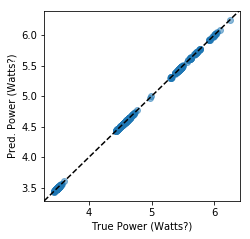

In [25]:
fig, ax = plt.subplots()

# Make the plot
ax.scatter(y, y_pred, alpha=0.5)
print (y)

# Make it pretty
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_xlim())

ax.set_xlabel('True Power (Watts?)')
ax.set_ylabel('Pred. Power (Watts?)')

fig.set_size_inches(3.5, 3.5)

# Add in the goal line
ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--');

## Estimating Prediction Accuracy
Using cross-validation to train a model on one subset of the training data and evaluate it on antoher

In [34]:
all_y_test = np.zeros((0,))
all_y_pred = np.zeros((0,))
for train_inds, test_inds in ShuffleSplit(n_splits=5, test_size=0.1).split(X,y):
    # Split off the train and test set
    X_test, y_test = X[test_inds, :], y[test_inds]
    X_train, y_train = X[train_inds, :], y[train_inds]
    #print(test_inds)
    #print(X_test.shape)
    #print(y_test.shape)
    #print(X[test_inds])
    #print(X[train_inds, :])
    # Train the model
    gp.fit(X_train, y_train)
    y_pred = gp.predict(X_test)
    
    # Append the results
    all_y_test = np.concatenate((all_y_test, y_test))
    all_y_pred = np.concatenate((all_y_pred, y_pred))

/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9.64243393e+02, -3.38135819e-33]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 59, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-77.59963254,  -0.        ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 1.56064317e+002, -9.18912995e-308]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 75, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/g

In [38]:
print ("R:", sp.stats.pearsonr(all_y_test, all_y_pred)[0])
print ("MAE:", np.abs(all_y_test - all_y_pred).mean(), 'Watts?')
print ("RMSE:", np.sqrt(np.power(all_y_test - all_y_pred, 2).mean()), 'Watts?')

R: 0.08584101277019633
MAE: 2.8179220217764915 Watts?
RMSE: 3.601351080431655 Watts?


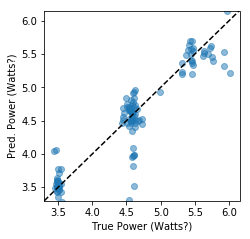

In [39]:
fig, ax = plt.subplots()

# Make the plot
ax.scatter(all_y_test, all_y_pred, alpha=0.5)

# Make it pretty
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_xlim())

ax.set_xlabel('True Power (Watts?)')
ax.set_ylabel('Pred. Power (Watts?)')

fig.set_size_inches(3.5, 3.5)

# Add in the goal line
ax.plot(ax.get_xlim(), ax.get_ylim(), 'k--');

## Saving model

In [40]:
gp.fit(X,y)

/usr/local/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([  6.5821956 , -90.81746161]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 72, 'nit': 9, 'warnflag': 2}
  " state: %s" % convergence_dict)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [42]:
pkl.dump(gp, open('power_gaus-model.pkl', 'wb'))

In [44]:
with open ("power_gaus-model.pkl", 'rb') as fp:
    model2 = pkl.load(fp)
print (model2)
model2.predict([[400000,0,1,0,0,0,0,0,1]])

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=10), n_restarts_optimizer=9,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)


array([3.261986])

In [47]:
# from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
#                              f1_score)
# print("\tF1: %1.3f\n" % f1_score(all_y_test, all_y_pred))
